## Suggested VScode package

### Python extension pack
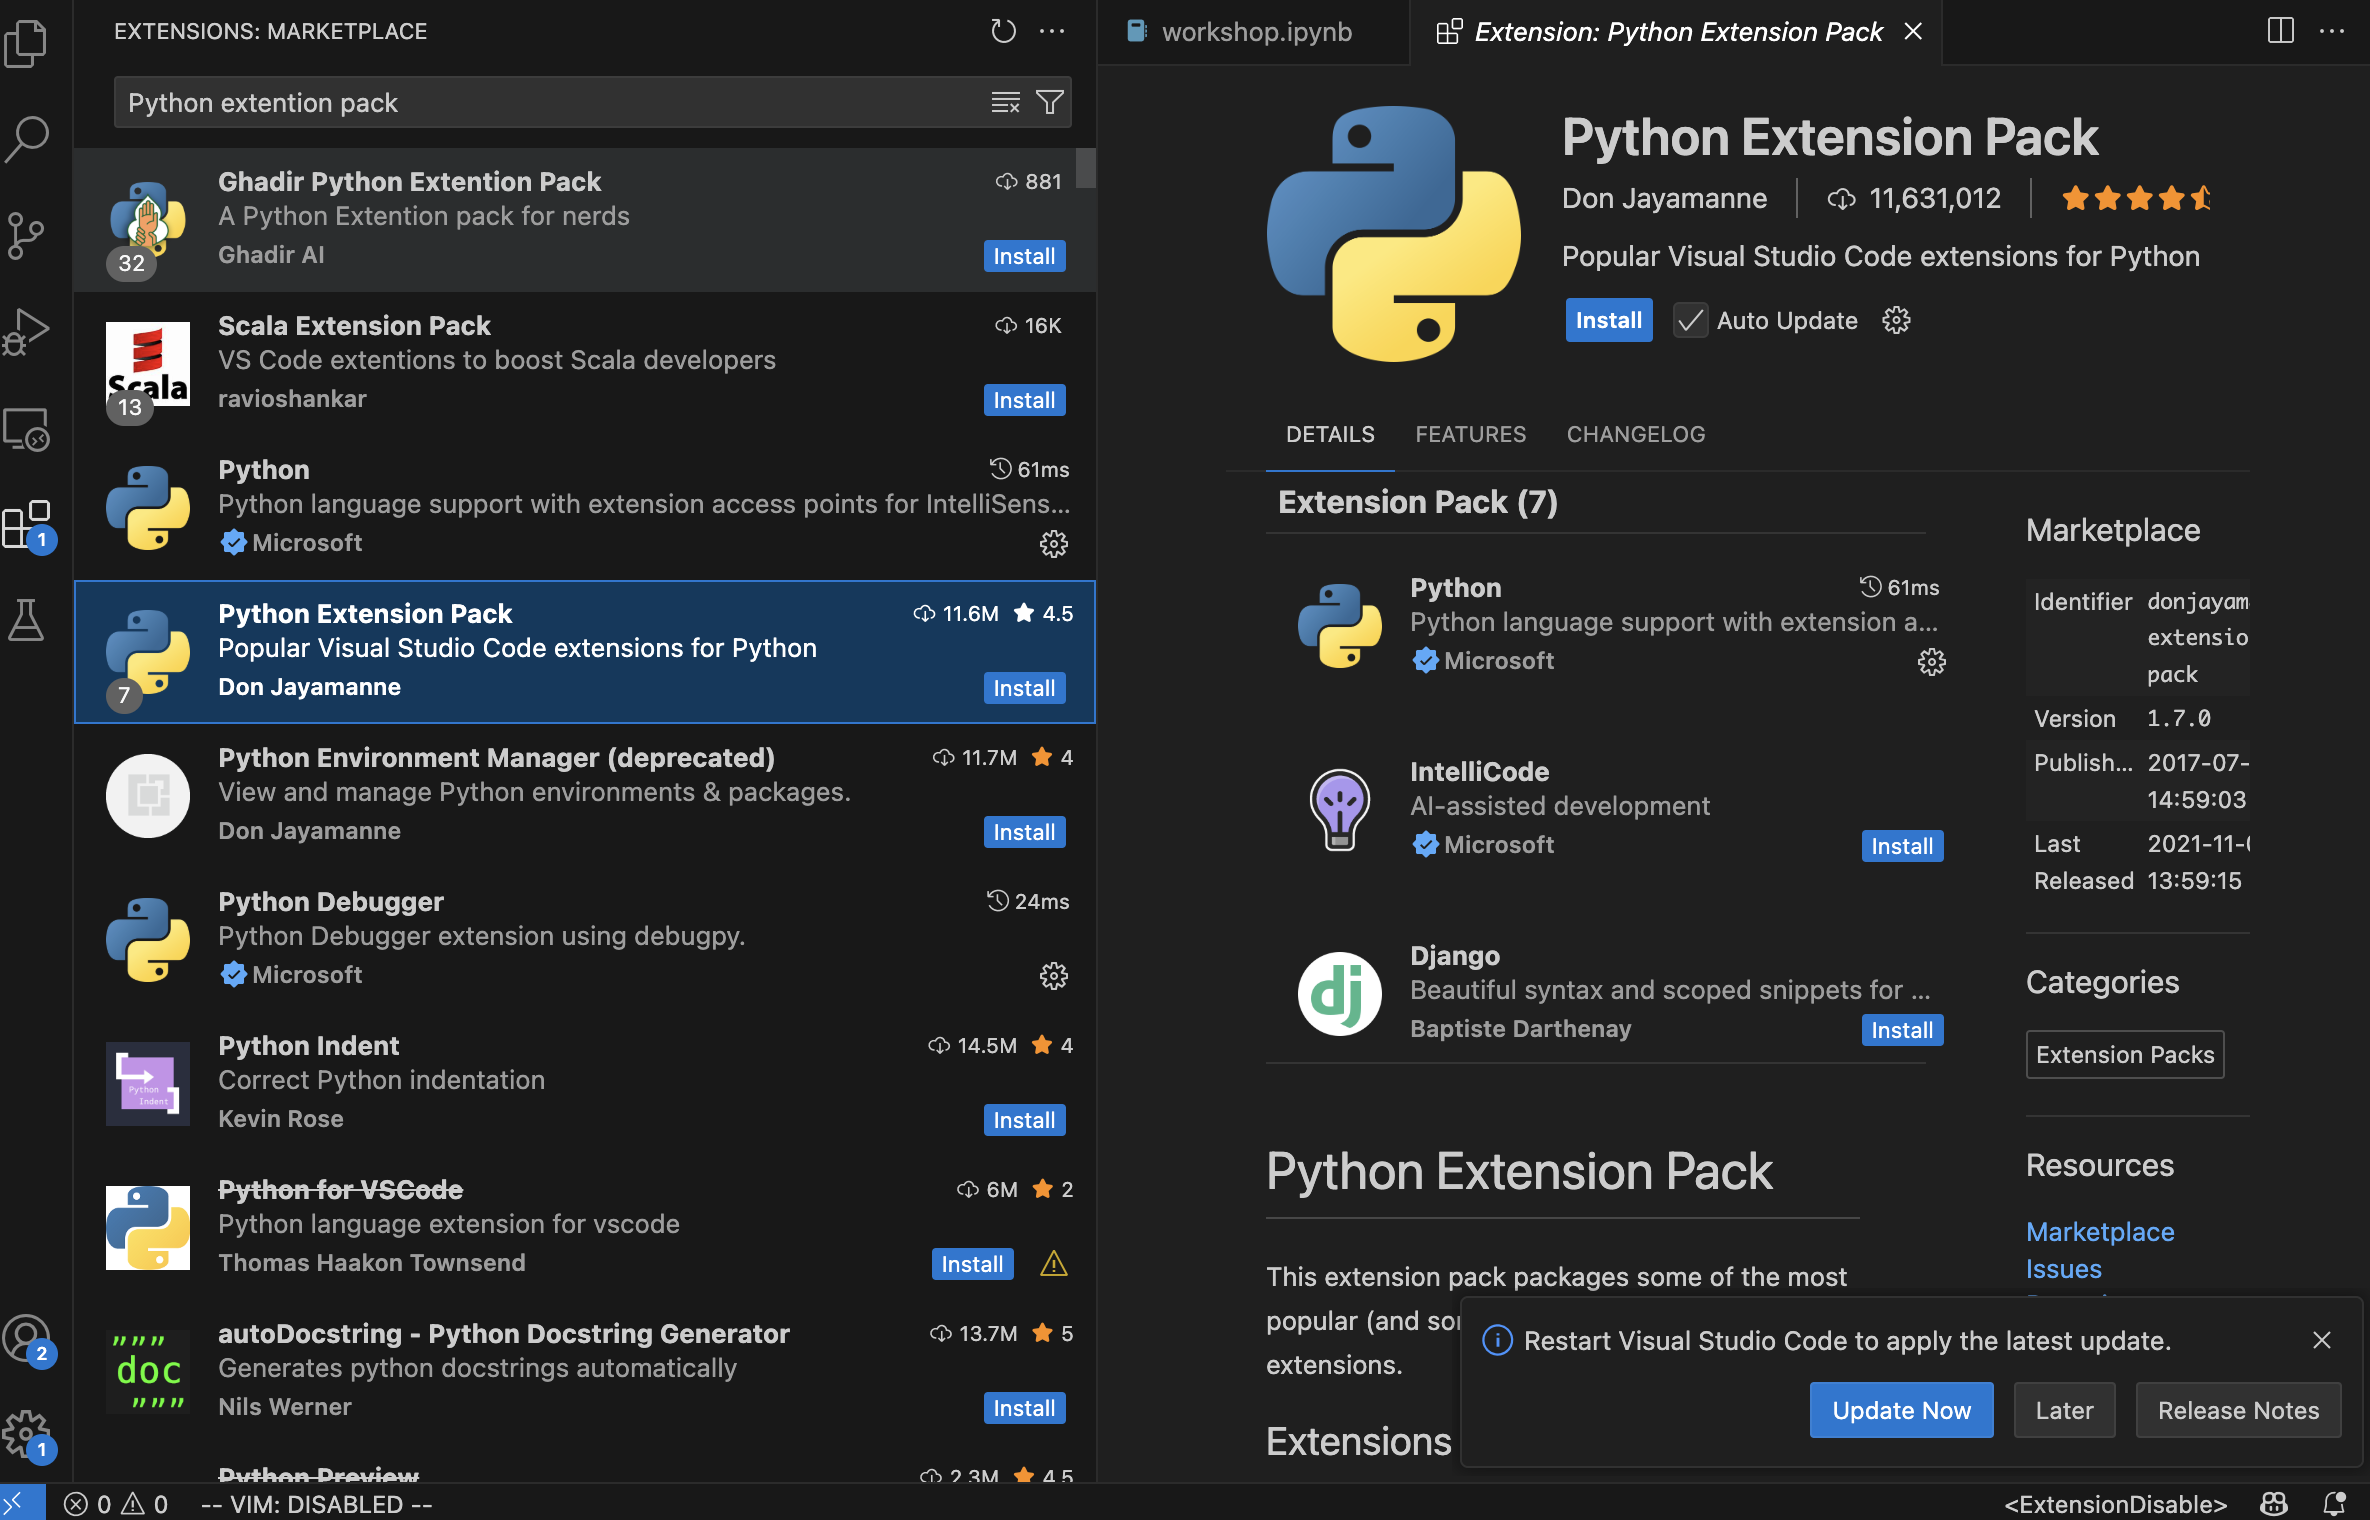

### Vscode pet/vscode pokemon
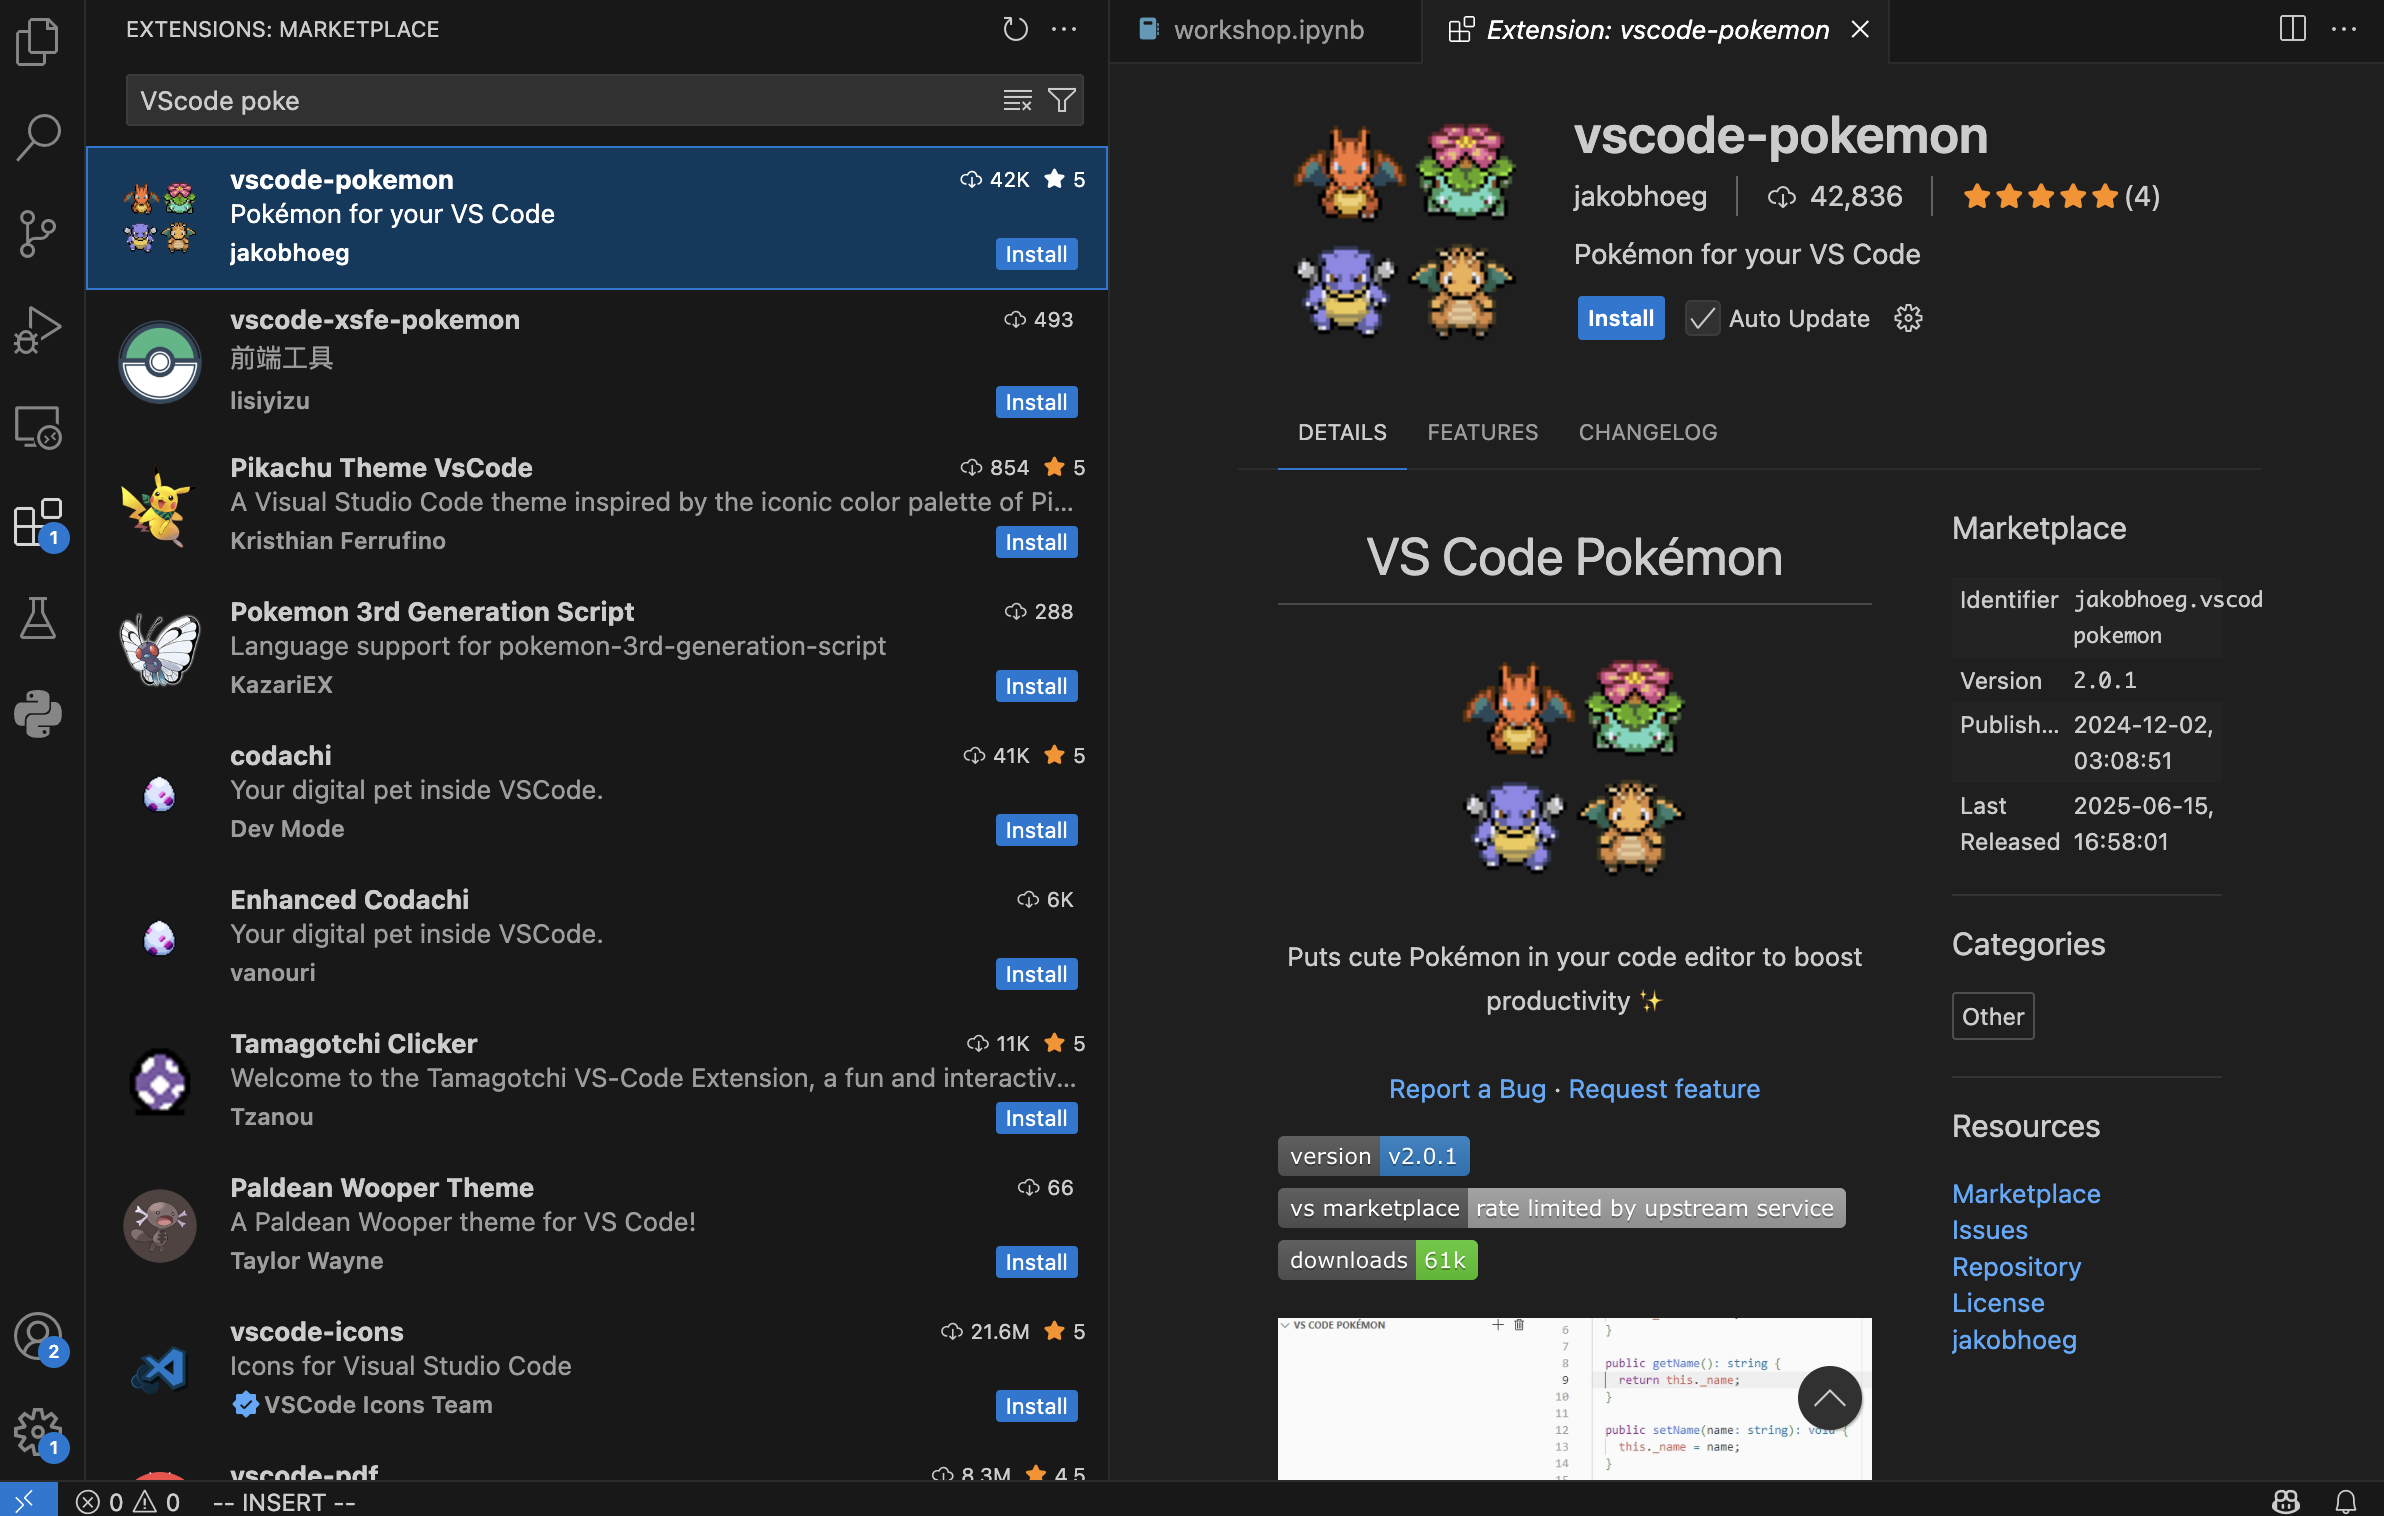
##### press "control(command)" + ","
##### then search pokemon, you can change your settings
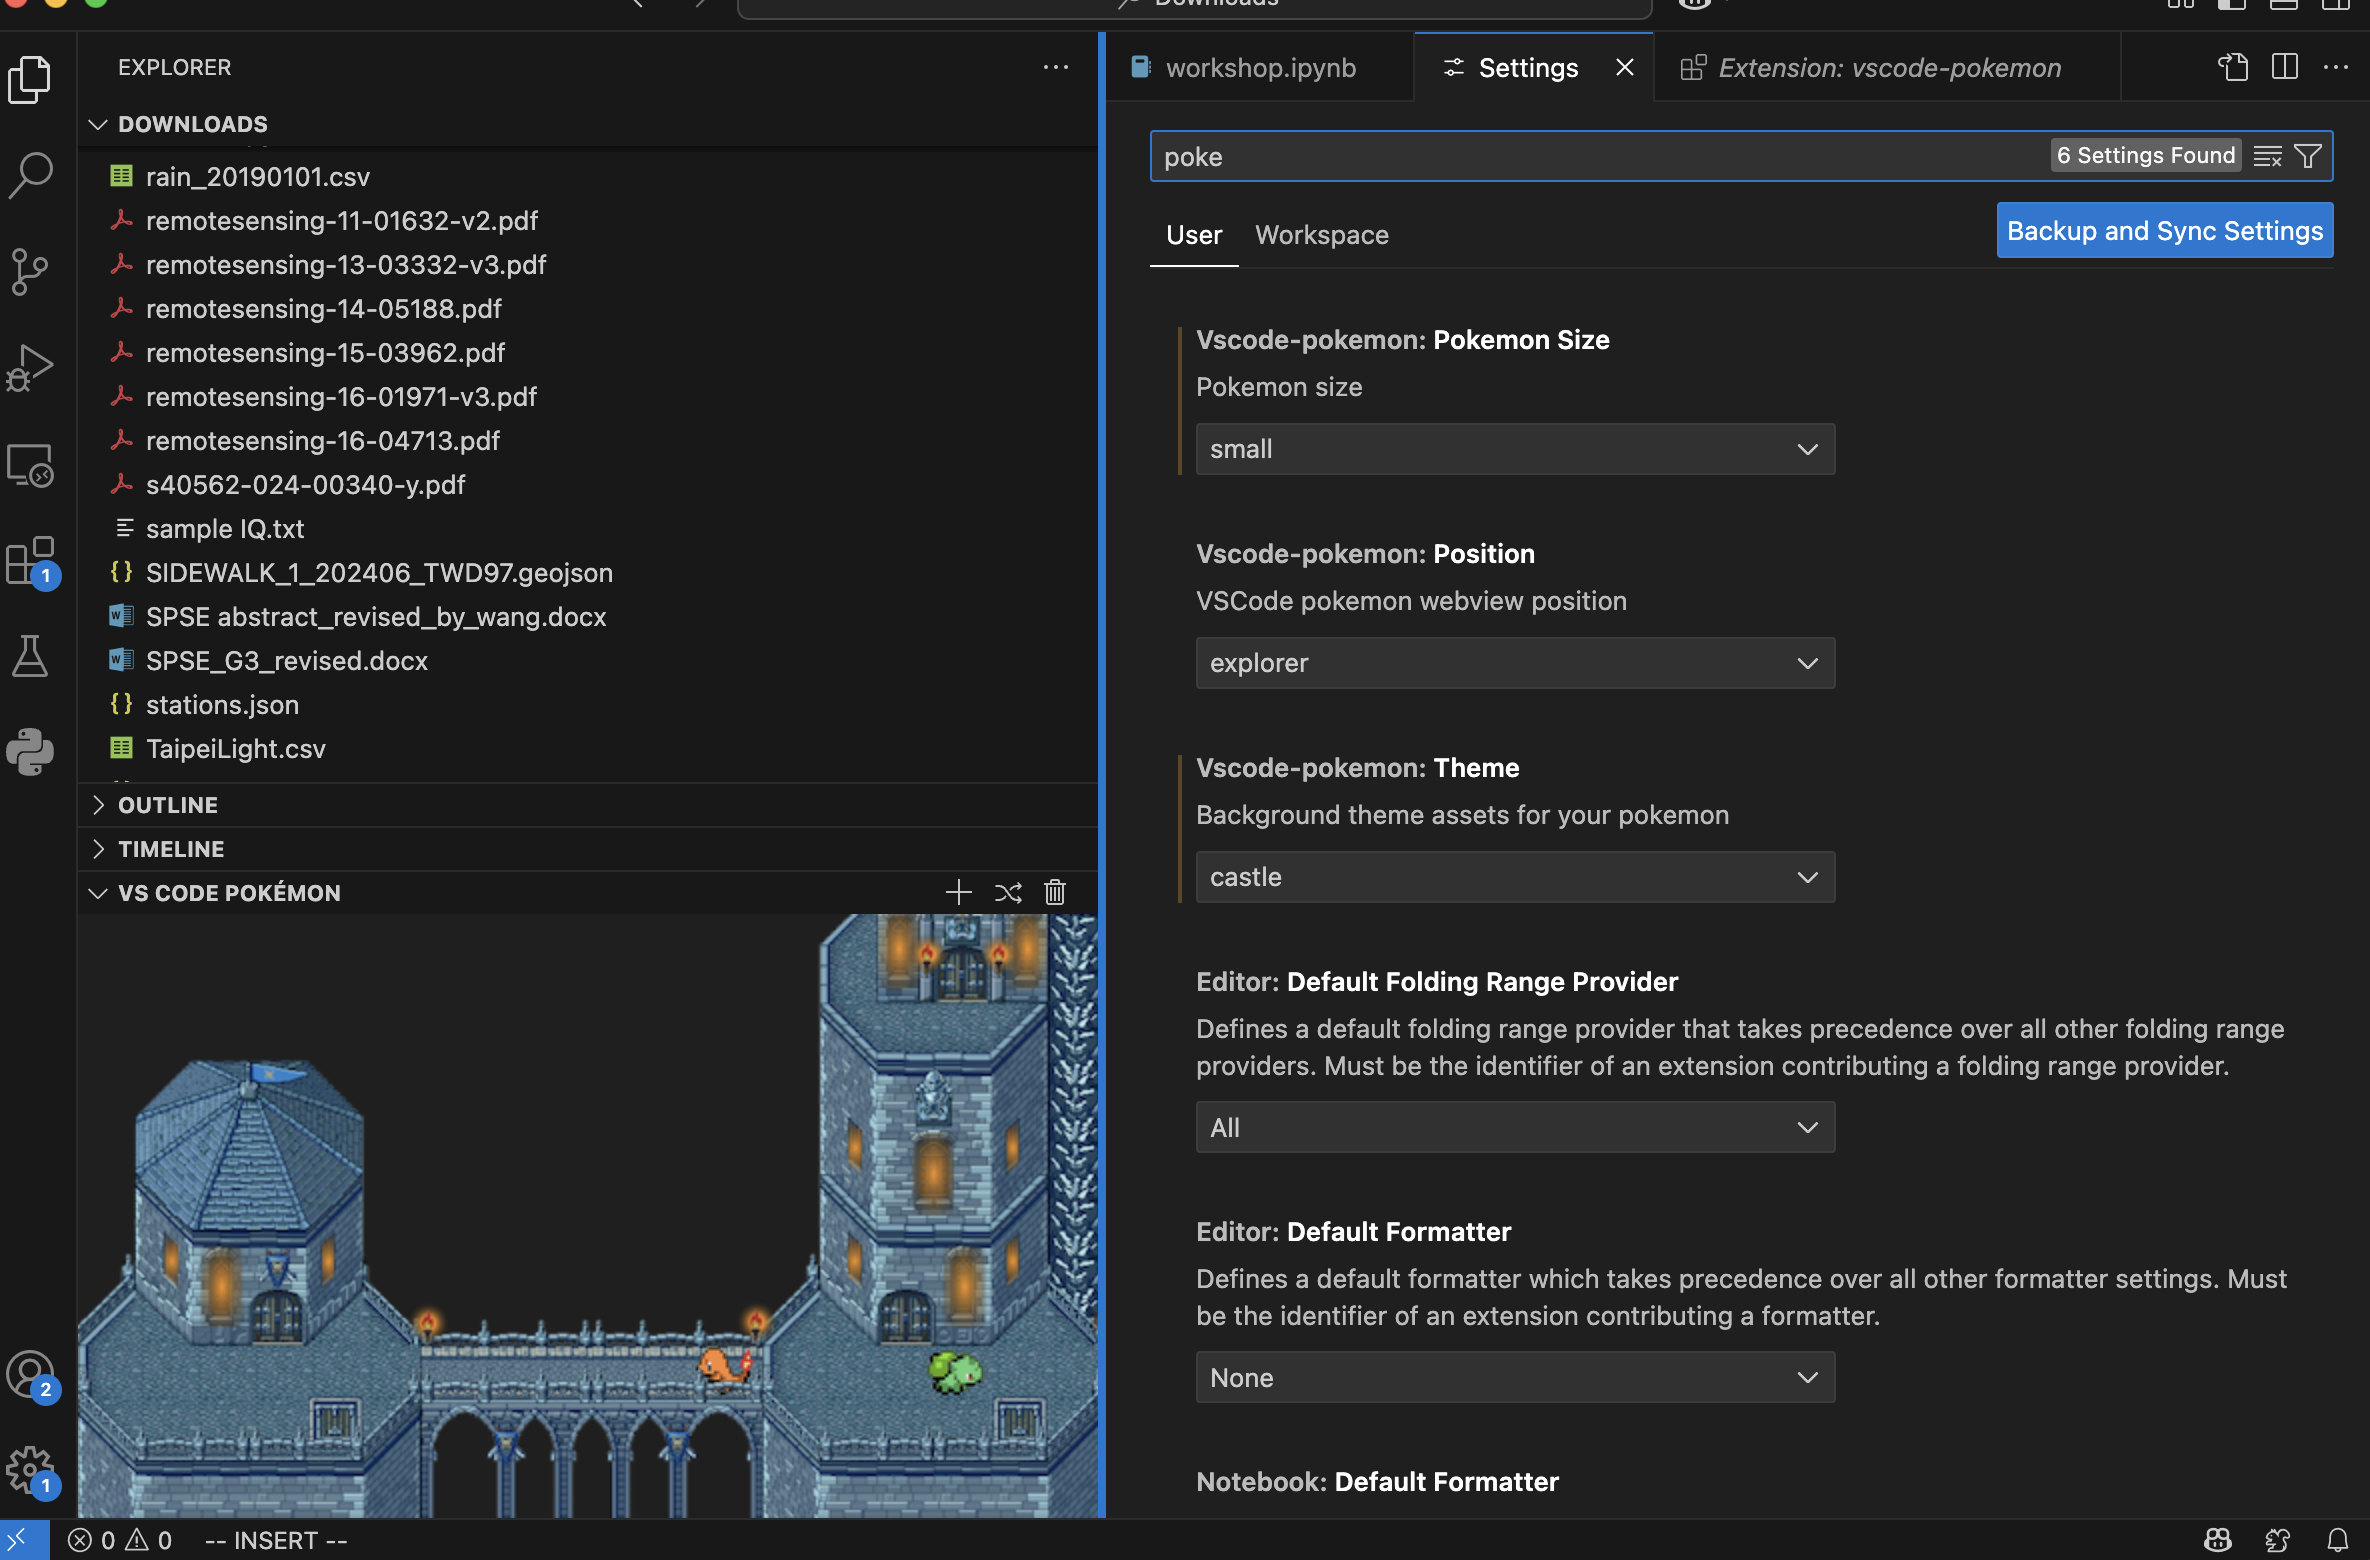


### CodeSnap
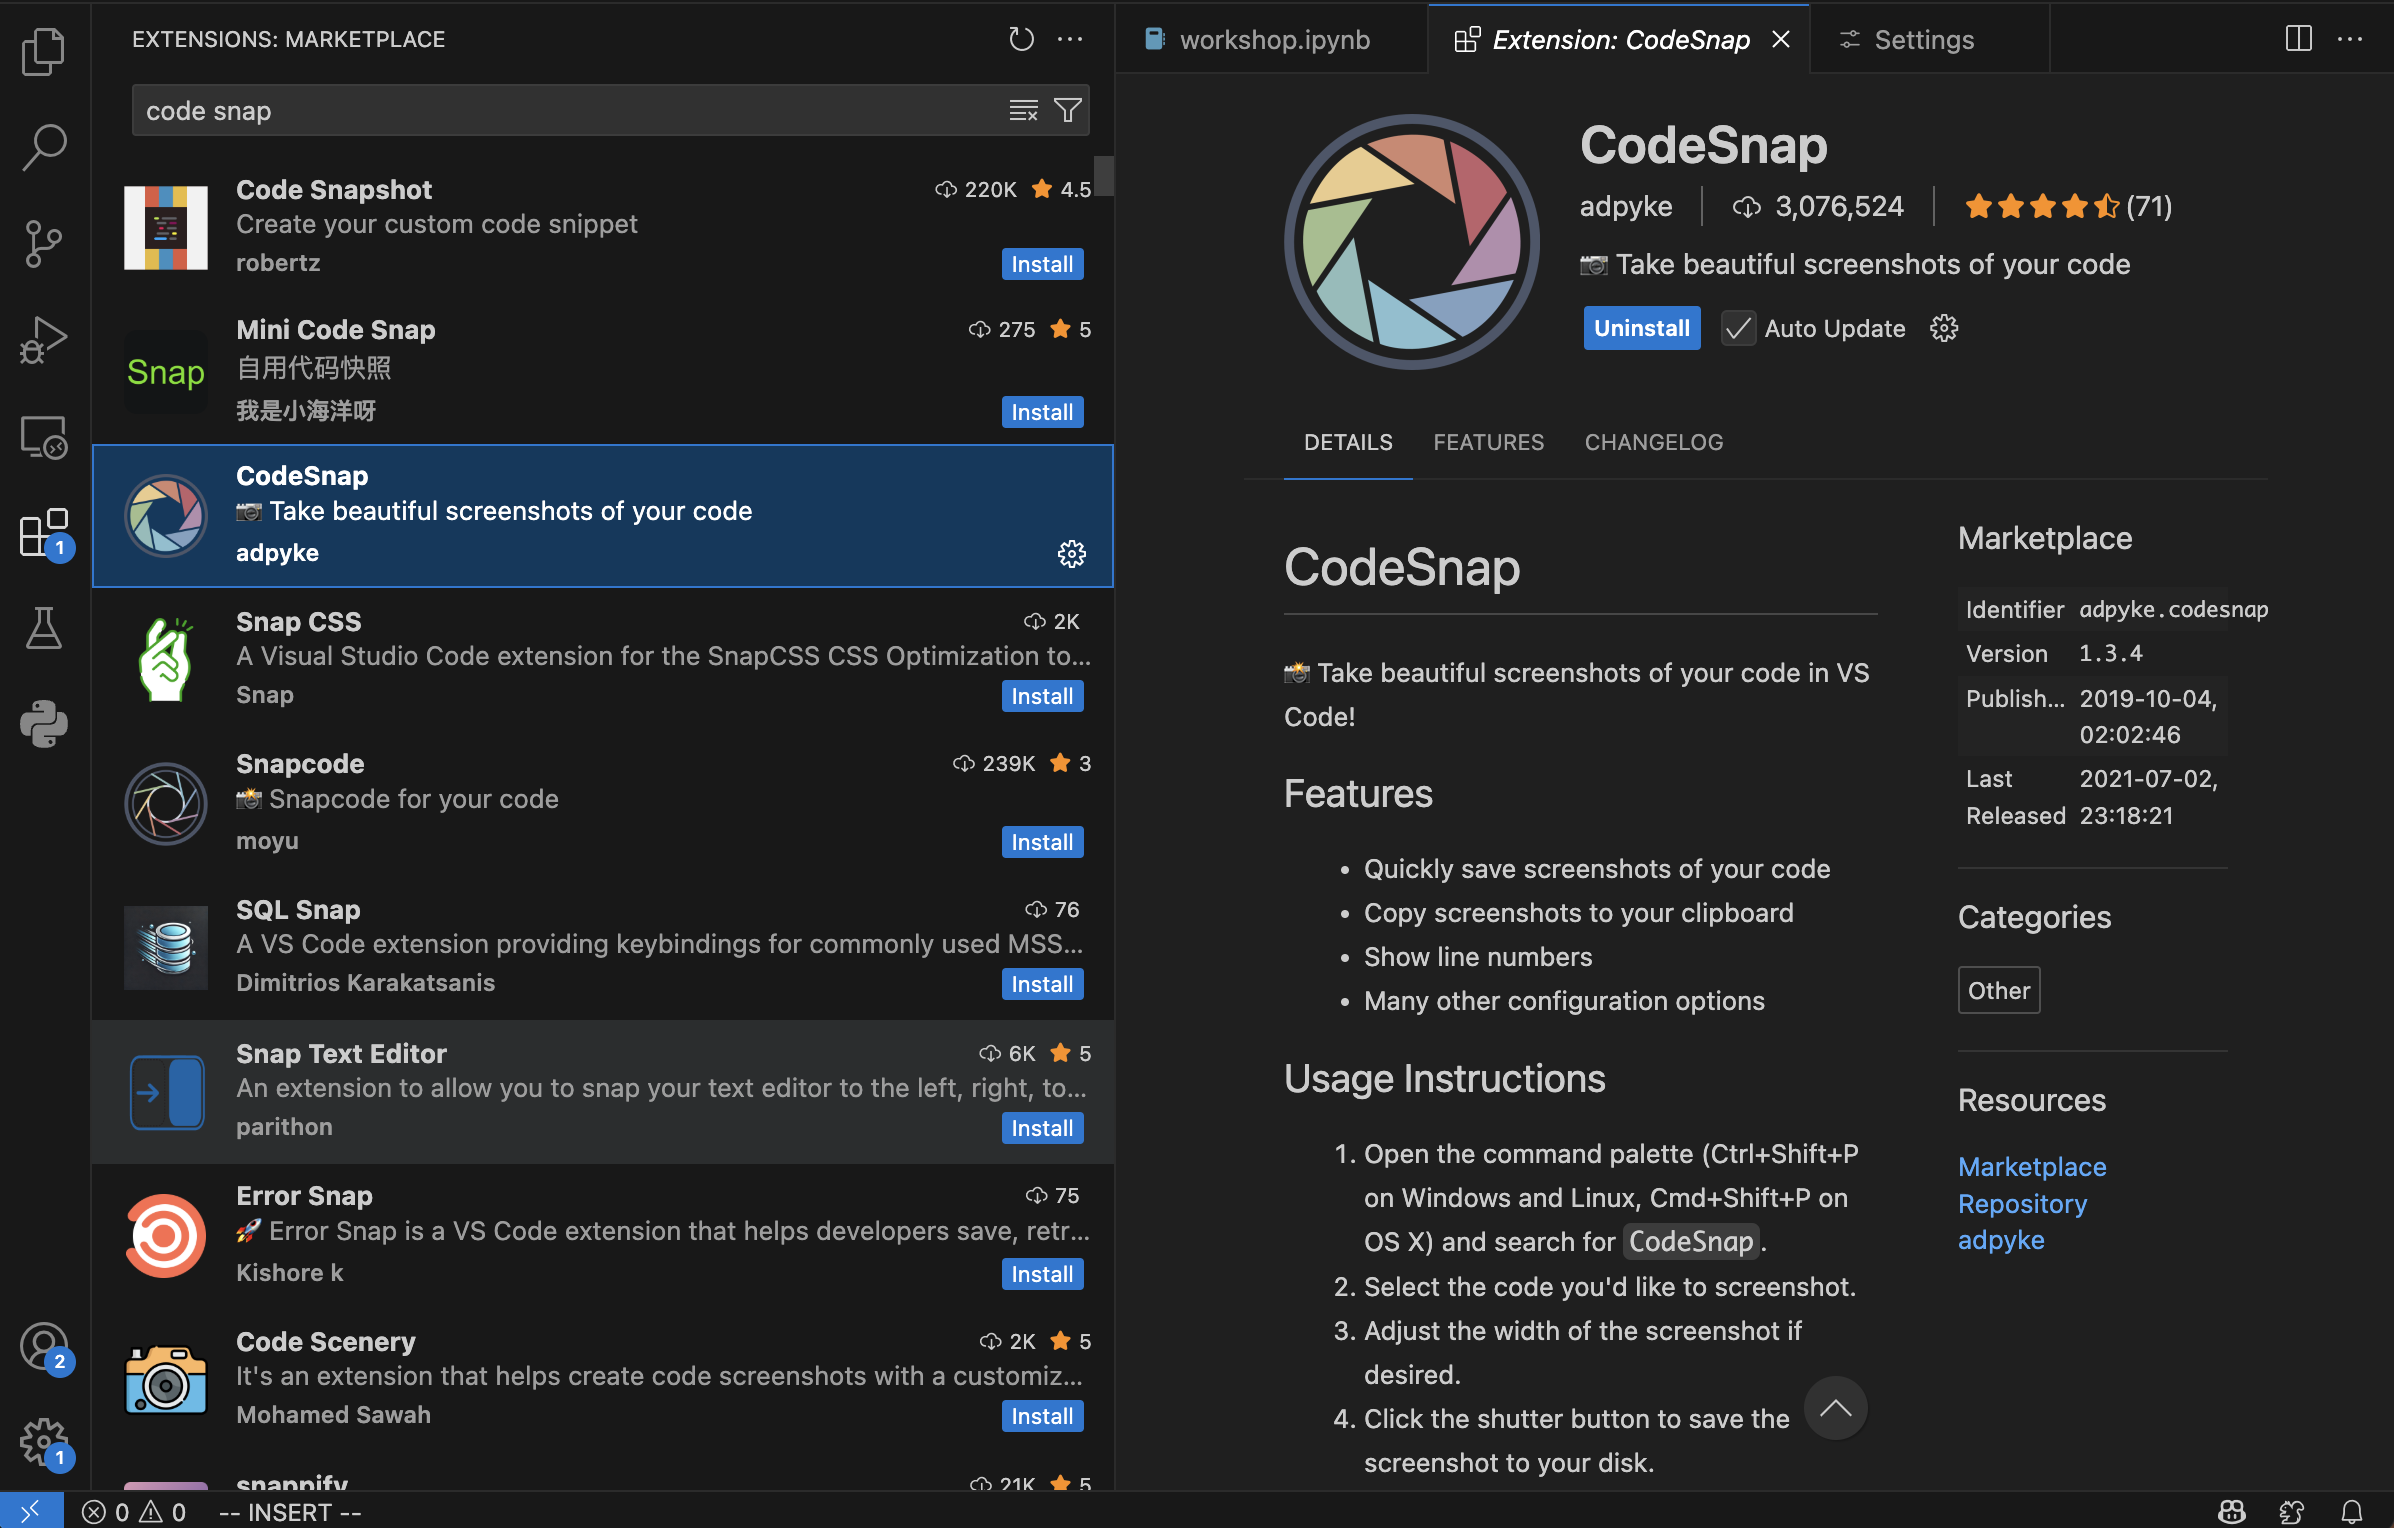
##### press "control" + "Shift" + "P" then choose CodeSnap 
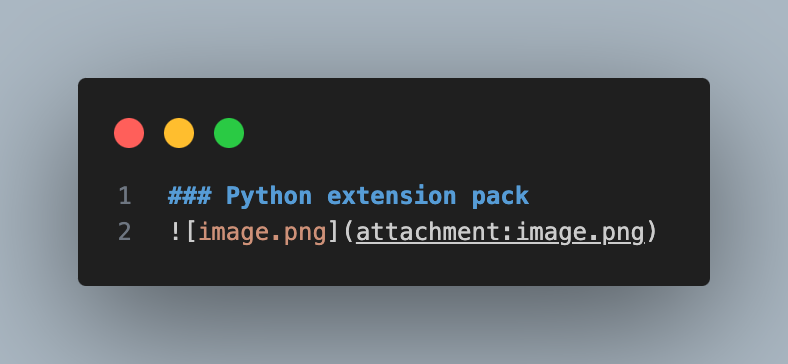

### Rainbow CSV
#### Before you download RainbowCSV,please open the csv in the folder
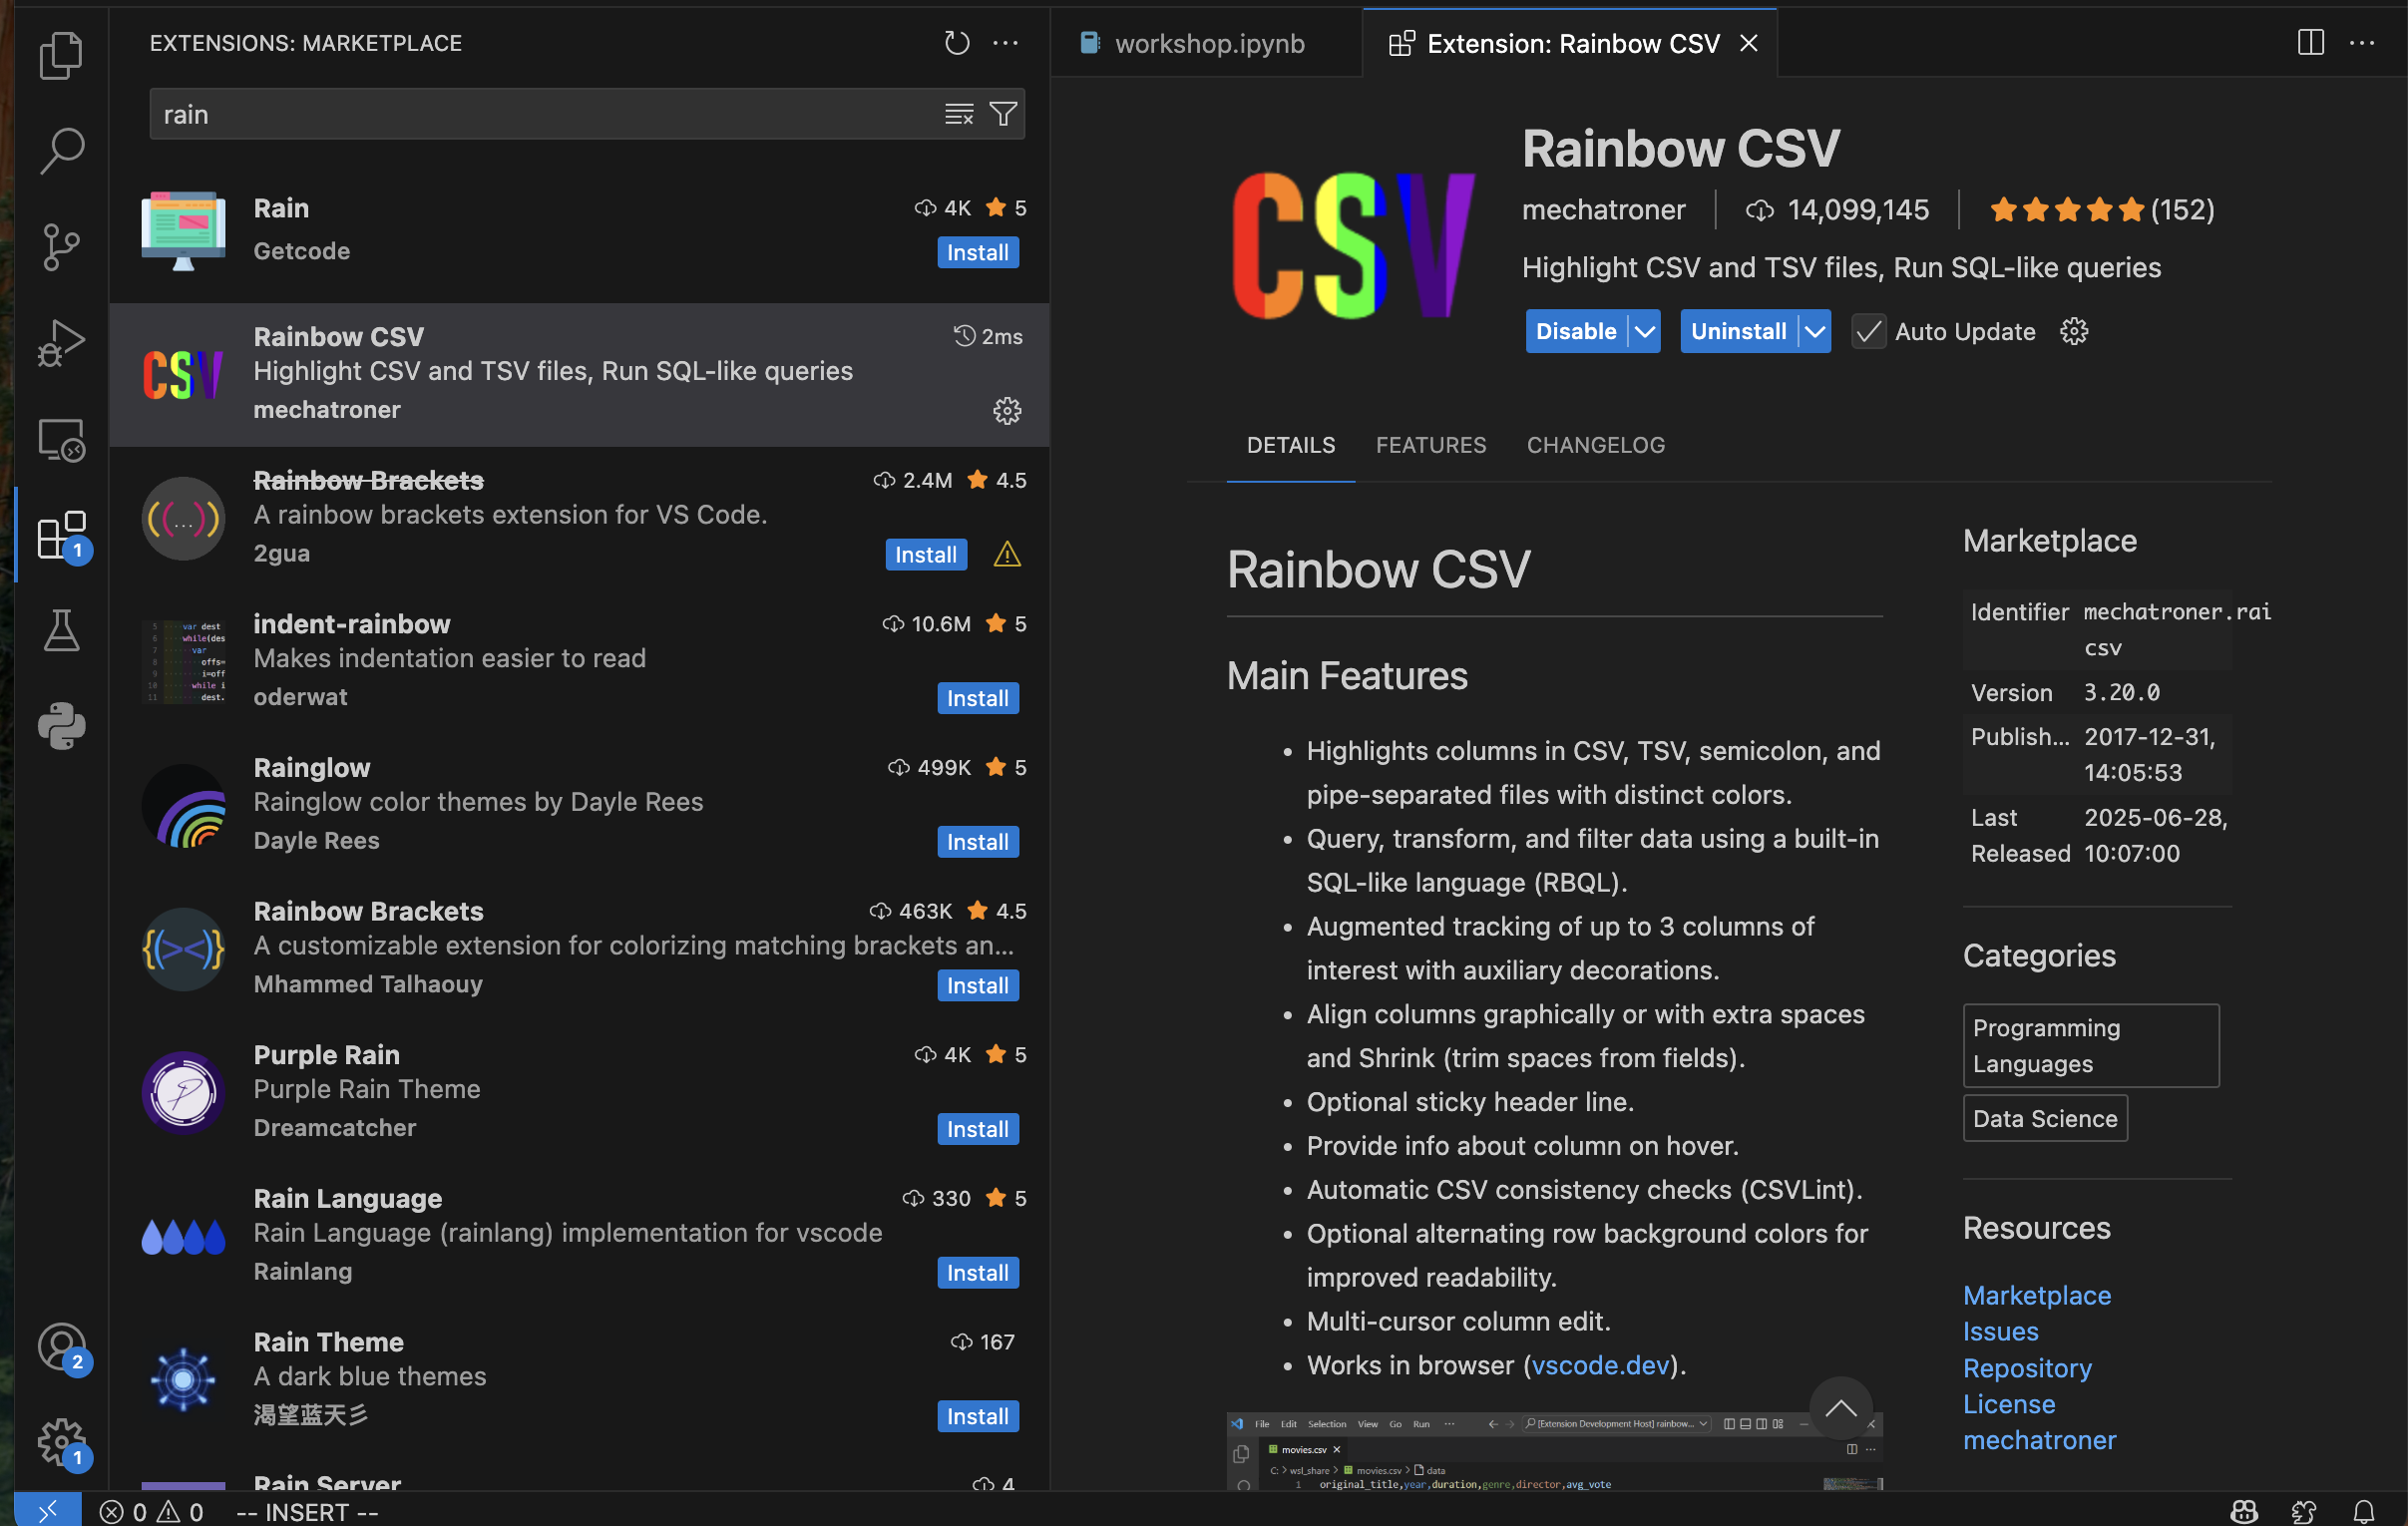
#### try it again

### Prettier
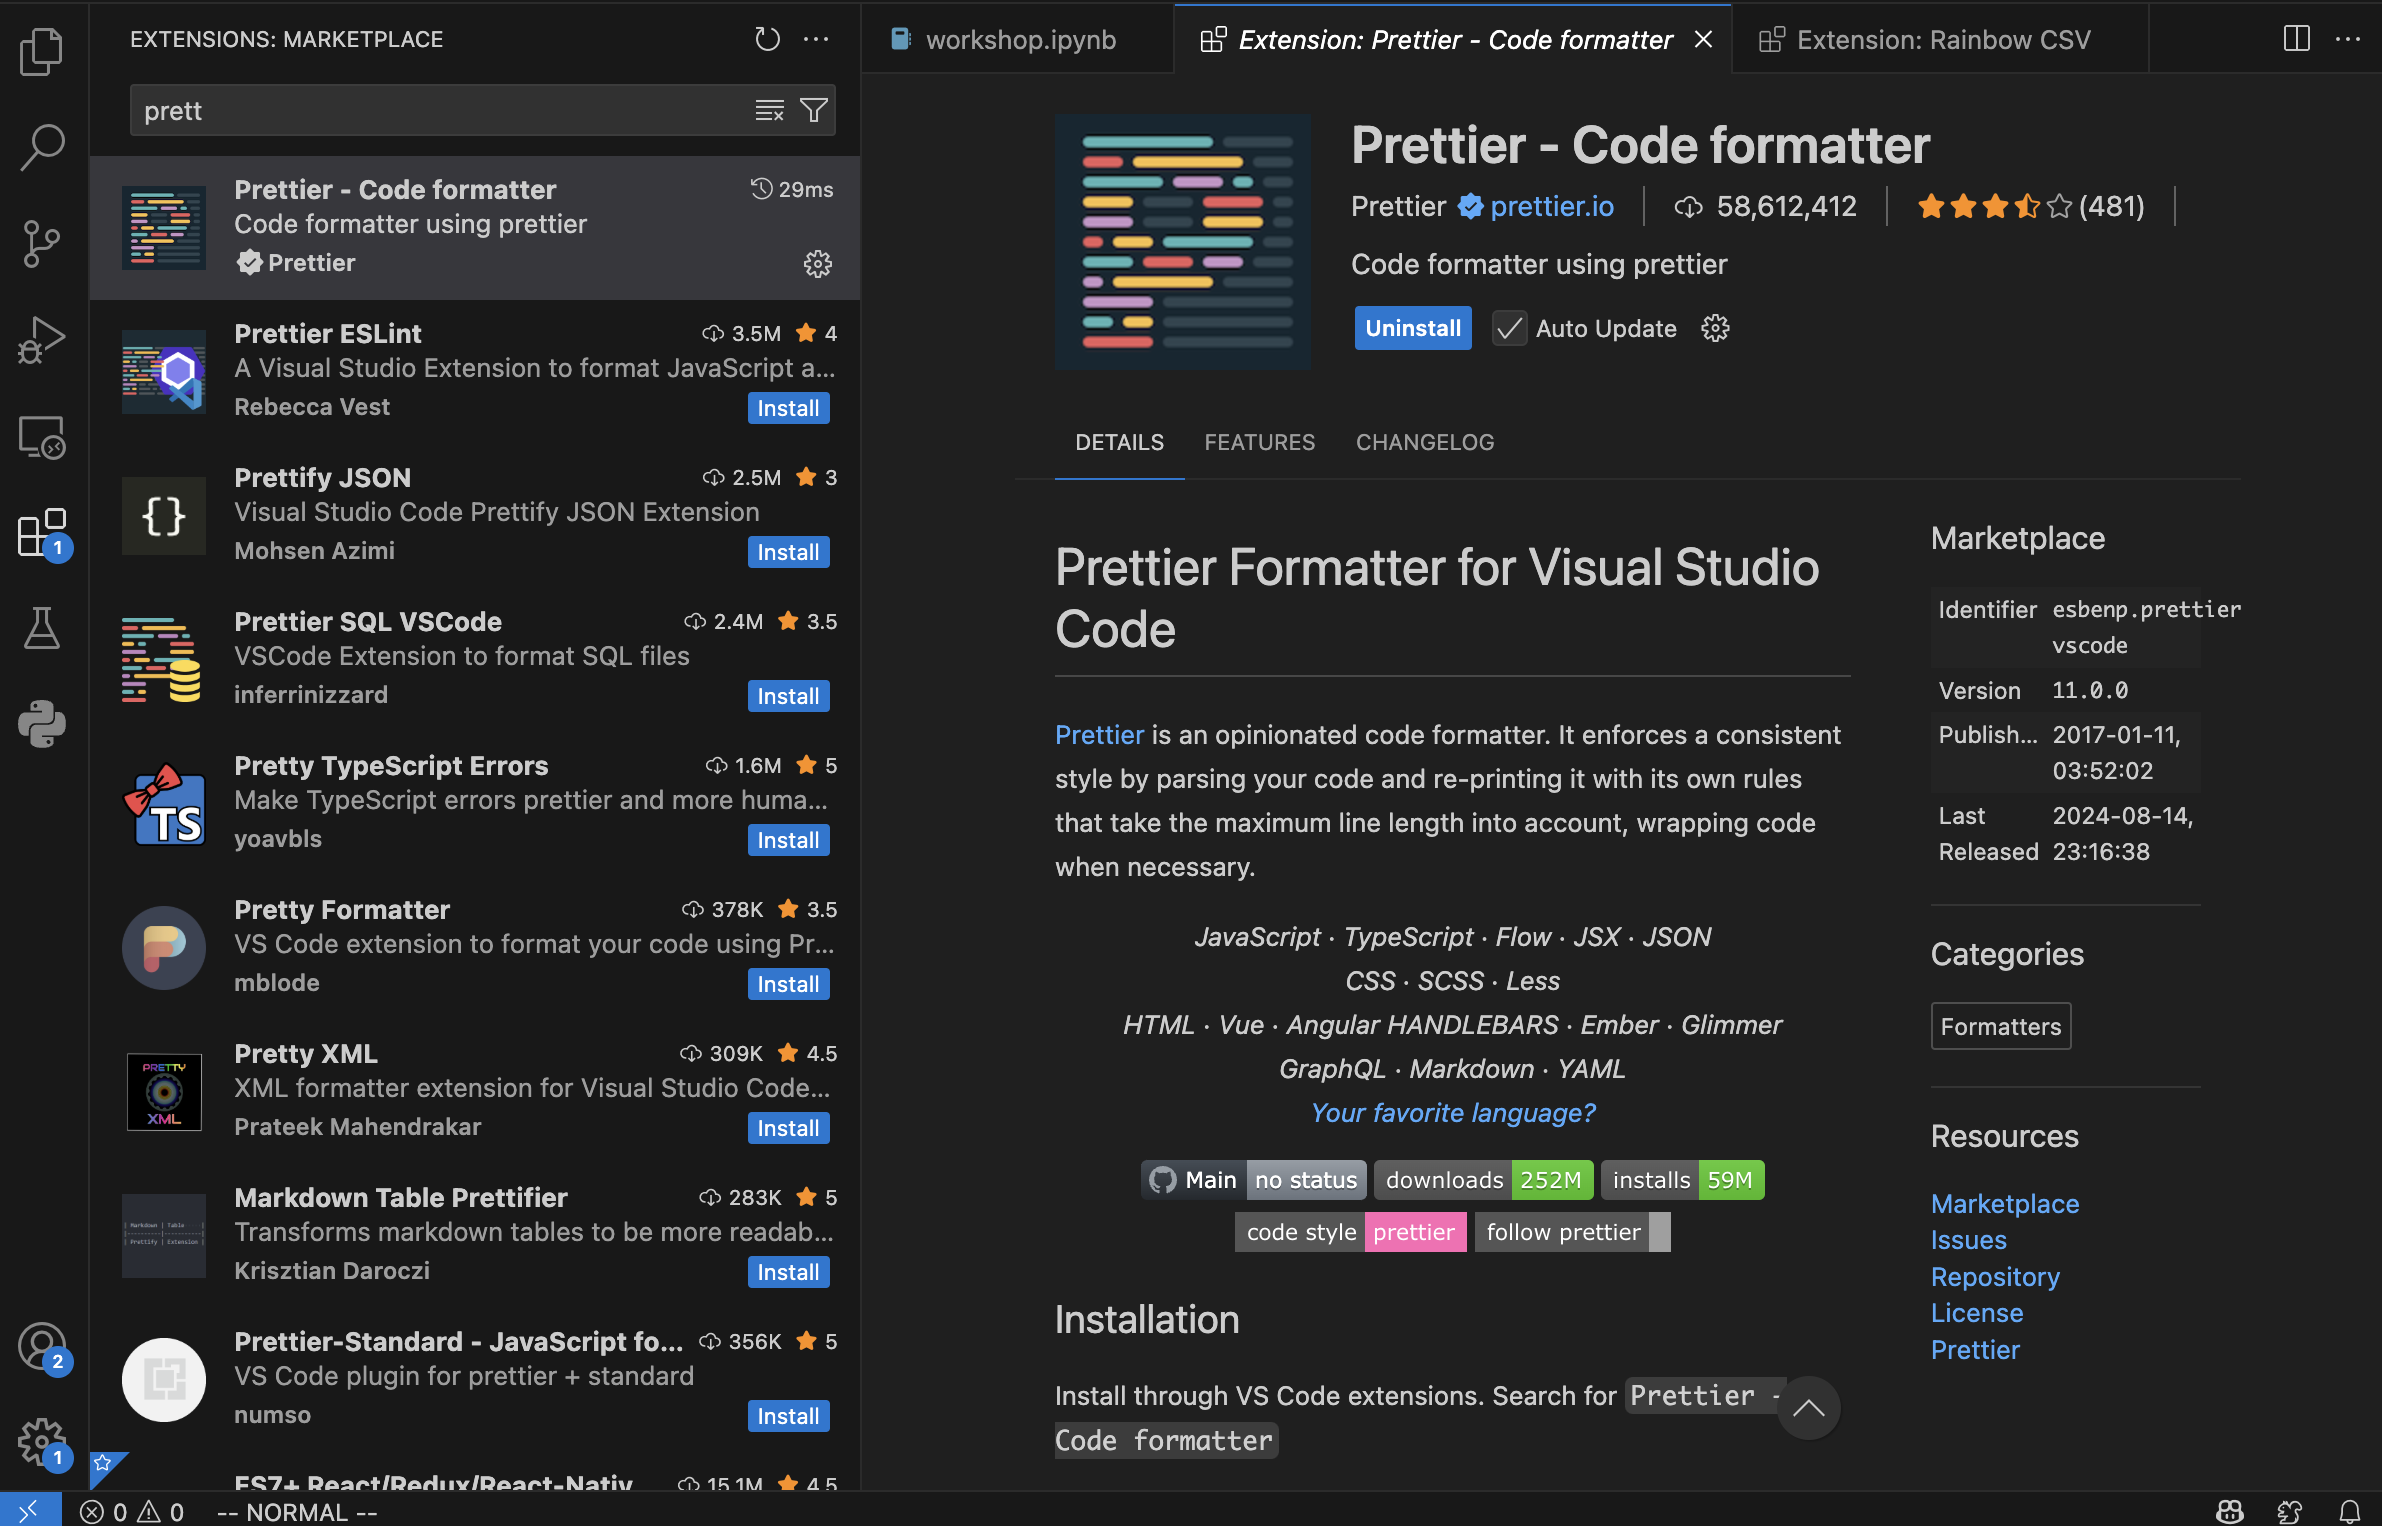

In [1]:
!pip install h5py
!pip install numpy
!pip install cartopy
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   --- ------------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.1 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/11.0 MB 1.1 MB/s eta 0:00:10
   --- ------------------------------------ 1.0/11.0 MB 1.1 MB/s eta 0:00:10
   ---- ----------------------------------- 1.3/11.0 MB 1.1 MB/s eta 0:00:10
   ----- ---------------------------------- 1.6/11.0 MB 1.1 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.0 MB 1.1 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.0 MB 1.1 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.0 MB 1.1 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.0 MB 1.1 MB/s eta 0:00:09
   ------ ---------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


### hdf5 process

In [2]:
import h5py
import os
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

filename = "./MREF3D21L.20120824.1640.hdf5"

with h5py.File(filename, 'r') as hdf5:
    maxdbz_data = np.array(hdf5['dataset1']['data1']['data'])
    vil_data = np.array(hdf5['dataset5']['data1']['data'])

    # set maxdbz_data < 0 as np.nan
    maxdbz_data[maxdbz_data<0] = np.nan

    where_data = {}
    for key, value in hdf5['where'].attrs.items():
        where_data[key] = value

    lats = np.linspace(where_data['LL_lat'], where_data['UL_lat'], where_data['ysize'])
    lons = np.linspace(where_data['LL_lon'], where_data['LR_lon'], where_data['xsize'])
    lon_grid, lat_grid = np.meshgrid(lons, lats)

c:\Users\a0903\WPy64-31241\python-3.12.4.amd64\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


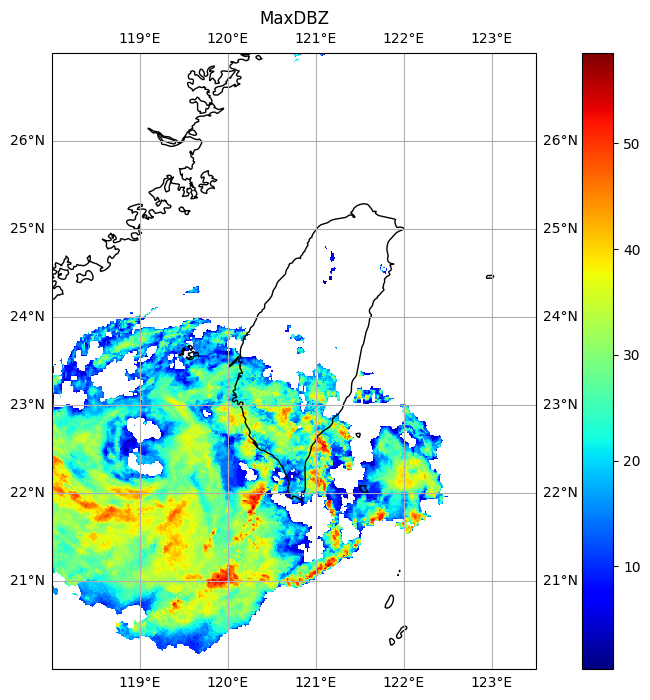

In [3]:
# Create a Cartopy projection (cylindrical equidistant)
projection = ccrs.PlateCarree()

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=projection)

# Plot the advection data using imshow with extent and cmap
plt.imshow(
    maxdbz_data,
    extent=(lon_grid.min(), lon_grid.max(), lat_grid.min(), lat_grid.max()),
    cmap='jet',
    origin='lower',  # Ensure correct orientation
    transform=projection  # Use the PlateCarree projection
)

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Add a colorbar
cbar = plt.colorbar(orientation='vertical')

# Set plot title and labels
plt.title('MaxDBZ')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


### download panoply
https://www.giss.nasa.gov/tools/panoply/download/